# Exploratory Analysis of DANDI:001276

**NG-CANCAN Remote Targeting Electroporation: Impact of Burst Number Variation on Permeabilization Distribution in Confluent Cell Monolayers**

---

**DISCLAIMER:** This notebook was auto-generated by AI (`dandi-notebook-gen`) and has not been fully validated. Users should carefully review all code, outputs, and interpretations before drawing any scientific conclusions.

---

This dataset involves electroporation experiments on cell monolayers to study electroporation effects using optimized ultra-short pulse protocols. Fluorescent dyes indicate nuclei (Hoechst stain imaged as DAPI channel) and membrane permeabilization (YoPro-1 imaged as FITC channel).

Acquisition was performed with an Olympus IX83 microscope and Hamamatsu camera.

The data contains very large fluorescence microscopy images (~19K x 19K pixels) stored in NWB format.

## Dandiset Metadata

- **Identifier:** DANDI:001276 (draft version)
- **Title:** NG-CANCAN Remote Targeting Electroporation
- **Description:**  
  Experiments were conducted using a four-electrode array focusing on optimizing the CANCAN protocol with variations in burst number, targeting cell permeabilization. Imaging includes Hoechst (DAPI) for nuclei and YoPro-1 for permeability assessment.
- **Citation:**  
  Silkuniene, Giedre; Silkunas, Mantas; Pakhomov, Andrei (2025). NG-CANCAN Remote Targeting Electroporation. (Version draft). DANDI Archive.
- **Contributors:** National Institutes of Health, Pakhomov Lab at Old Dominion University.
- **License:** CC-BY-4.0

## List All Assets in This Dandiset
This code retrieves asset list using DANDI API client:


In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001276")
assets = list(dandiset.get_assets())

print(f"Total assets: {len(assets)}")
for asset in assets[:5]:
    print(asset.path)
print("...")

Total assets: 108
sub-P1-20240627-A2/sub-P1-20240627-A2_obj-fniblx_image.nwb
sub-P1-20240627-A3/sub-P1-20240627-A3_obj-1h4rh2m_image.nwb
sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb
sub-P1-20240627-A3/sub-P1-20240627-A3_obj-k9o87l_image.nwb
sub-P1-20240627-B1/sub-P1-20240627-B1_obj-1qpzwid_image.nwb
...


**Note:** The dataset contains over 100 NWB files, each containing large high-resolution images from various experimental sessions.

## Loading and Exploring an NWB File

Below, we demonstrate how to load one sample file and visualize fluorescence data.

We select this file:  
`sub-P1-20240627-A2/sub-P1-20240627-A2_obj-1aoyzxh_image.nwb`

The file is remotely accessed via Lindi.

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Acquisition Description (Subject-Specific): Subject ID: P1_20240627_A2, Fluorescent Channel: DAPI, Phase: pre (where 'pre' indicates imaging prior to exposure and 'post' indicates imaging of the same well after exposure).  CanCan protocol (with canceling pulses),011: Protocol consisted of 9 packets of pulses delivered at 0.2MHz frequency, protocol repeated 2 times at 1Hz frequency. General Protocol Description (Subject-Independent): Experiments were conducted using a four-electrode stainless steel setup with an inter-electrode distance of 10.0 mm. The CanCan exposure protocol involved delivering packets of 600 ns pulses from four electrodes. Initially, a single 600 ns pulse (7.2 kV) was applied from one electrode (e.g., electrode 1), constituting phase 1. Subsequently, simultaneous 600 ns pulses with an amplitude reduced by 12.5% were delivered from two electrodes (e.g., electrodes 2 and 4), followed by another set of simultaneous pulses with an additional 12.5% amplitude reduction fro

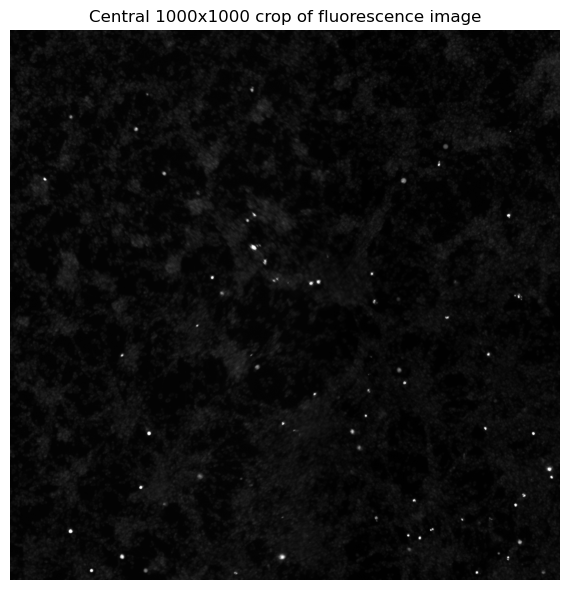

In [2]:
import lindi
import pynwb
import numpy as np
import matplotlib.pyplot as plt

# Connect to remote NWB file via Lindi
lindi_url = "https://lindi.neurosift.org/dandi/dandisets/001276/assets/95141d7a-82aa-4552-940a-1438a430a0d7/nwb.lindi.json"

f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
io = pynwb.NWBHDF5IO(file=f, mode='r')
nwbfile = io.read()

print(nwbfile.session_description)
print(f"File identifier: {nwbfile.identifier}")
print(f"Subject ID: {nwbfile.subject.subject_id}")
print(f"Session date: {nwbfile.session_start_time}")
print("")

# Access image data object
img_series = nwbfile.acquisition["SingleTimePointImaging"]
data = img_series.data
print("Data shape:", data.shape)

# For large datasets, avoid loading entire image.
# Here, we load a small central crop (~1000x1000 pixels).
shape = data.shape
crop_size = 1000
if len(shape) == 2:
    center_y = shape[0] // 2
    center_x = shape[1] // 2
    y_start = max(center_y - crop_size // 2, 0)
    x_start = max(center_x - crop_size // 2, 0)
    crop = data[y_start:y_start+crop_size, x_start:x_start+crop_size]
elif len(shape) == 3:
    center_y = shape[1] // 2
    center_x = shape[2] // 2
    y_start = max(center_y - crop_size // 2, 0)
    x_start = max(center_x - crop_size // 2, 0)
    crop = data[0, y_start:y_start+crop_size, x_start:x_start+crop_size]
else:
    raise ValueError("Unexpected data shape")

plt.figure(figsize=(6,6))
plt.imshow(crop, cmap='gray')
plt.title('Central 1000x1000 crop of fluorescence image')
plt.axis('off')
plt.tight_layout()
plt.show()

The above crop shows sparse fluorescent features consistent with nuclei staining amid a heterogeneous background.  
This subset serves as a preview; users are encouraged to explore regions or channels of interest by adjusting the crop coordinates.

## Notes and Extensions

- The images may be multiplane, multichannel, or multi-timepoint, so inspect `.data.shape` accordingly.
- Loading entire 19k x 19k images into memory may be impractical; prefer small crops or image pyramids if available.

**Common exploratory workflows might include:**
- Plotting histograms of pixel intensities
- Filtering or thresholding to segment nuclei
- Quantifying fluorescence intensity distributions

These analyses depend on specific scientific questions and should be adapted accordingly.

## Summary

This notebook introduced Dandiset 001276, retrieved metadata and assets, and demonstrated access and visualization of large microscopy images in NWB format.

Analyses were limited to simple visualization and preliminary exploration. No scientific conclusions should be drawn solely from this generated notebook.